## Naive Baiyes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [27]:
data = pd.read_excel("E:/Data Mining/pima.xlsx")

In [4]:
data.shape

(768, 9)

In [5]:
data.head()

,freq_pregnant,con_glukose,diastolic,thickness_skin,insulin,BMI,Diabetes_function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<function matplotlib.pyplot.show>

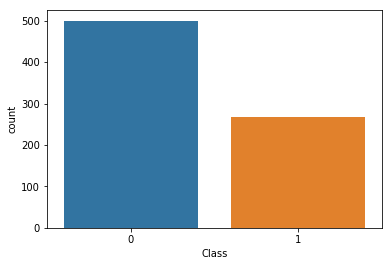

In [6]:
sns.countplot(x=data['Class'])
plt.show

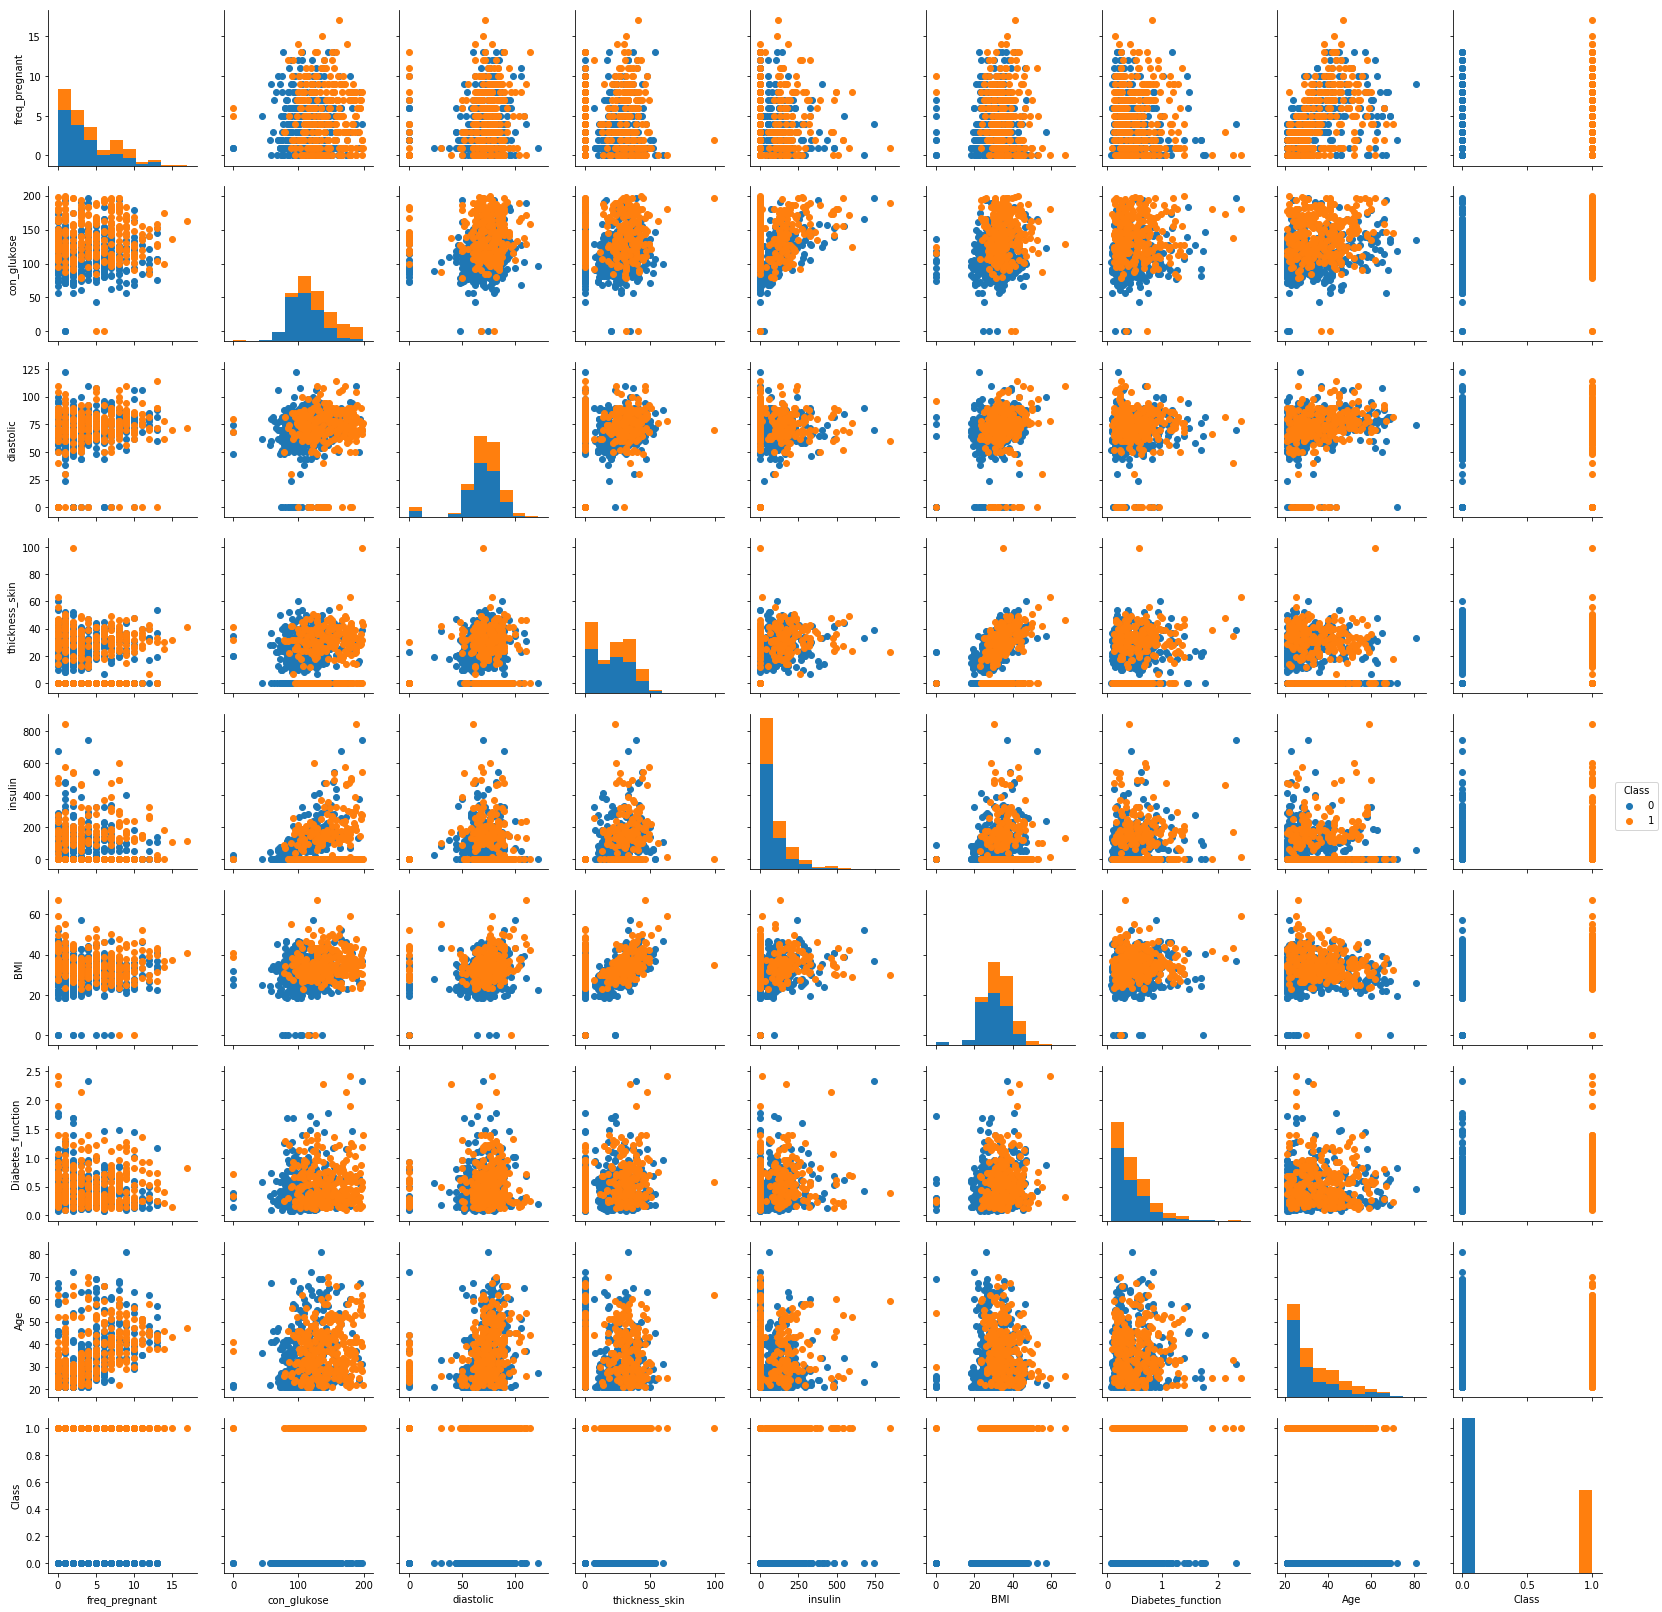

In [7]:
g = sns.PairGrid(data,hue="Class")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

## Split Train Test

In [9]:
from sklearn.model_selection import train_test_split

In [28]:
y = data['Class']
x = data.drop(['Class'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=123)

## Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [30]:
nb.score(x_train,y_train)

0.757328990228013

In [31]:
ynb_predict = nb.predict(x_test)
ynb_proba = nb.predict_proba(x_test)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, auc, roc_curve

In [33]:
conf_matrix = confusion_matrix(y_test,ynb_predict)
print(conf_matrix)

[[82 14]
 [22 36]]


In [34]:
classes = data['Class'].unique()
conf_matrix_df = pd.DataFrame(data=conf_matrix, columns=classes, index=classes)

In [35]:
conf_matrix_df

,0,1
0,82,14
1,22,36


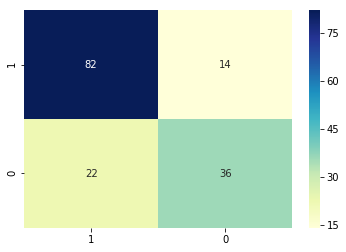

In [23]:
sns.heatmap(conf_matrix_df, annot=True, cmap="YlGnBu")
plt.show()

In [26]:
akurasinb = accuracy_score(y_test,ynb_predict)
akurasi

0.7662337662337663